In [1]:
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc

# import function to perform post-hoc
# install scikit_posthocs using "!pip install scikit_posthocs" 
import scikit_posthocs

import statistics

from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

In [2]:
df_pharma = pd.read_csv('Stats_project_dataset.csv')
df_pharma.head(10)

,Patient_id,Oxy_level,Pulse_rate,Blood_Sugar,Age,Sex,Old_1,Old_2,Old_3,New_1,New_2,New_3
0,COVPAT0001,97.109182,109.156925,83,5,M,30.08,23.14,33.58,30.51,28.75,22.47
1,COVPAT0002,98.039265,109.481086,119,3,M,18.38,28.86,38.32,21.66,28.53,16.05
2,COVPAT0003,97.904030,110.428601,80,8,F,30.27,24.32,42.16,21.99,31.26,20.15
3,COVPAT0004,99.212383,110.048527,95,5,M,28.81,21.73,21.46,24.66,26.34,15.90
4,COVPAT0005,99.235056,110.180046,82,6,M,25.06,32.65,27.54,25.84,20.59,21.65
5,COVPAT0006,98.955697,110.725100,97,5,M,24.97,25.79,42.23,27.37,25.13,25.05
6,COVPAT0007,98.246181,109.927157,80,3,M,25.15,21.53,31.54,17.55,25.24,20.29
7,COVPAT0008,100.082687,109.694405,98,7,F,28.67,23.53,49.29,26.28,24.21,14.60
8,COVPAT0009,100.189262,110.339871,81,9,F,29.46,21.79,41.70,19.84,25.24,16.65
9,COVPAT0010,99.760662,109.761587,88,7,M,22.46,21.59,40.61,26.24,22.69,23.50


In [3]:
df_pharma.Oxy_level.mean()

98.99711569590404

In [4]:
df_pharma.Pulse_rate.mean()

110.00395163116018

In [5]:
df_pharma.Blood_Sugar.mean()

153.1158

In [6]:
df_pharma.Age.mean()

43.6096

In [7]:
len(df_pharma)

5000

In [8]:
df_pharma.std()

Oxy_level       1.014435
Pulse_rate      1.001546
Blood_Sugar    62.054954
Age            25.584239
Old_1           4.022403
Old_2           3.994238
Old_3           9.953971
New_1           3.989473
New_2           4.936922
New_3           3.983410
dtype: float64

In [9]:
z_val = np.abs(round(stats.norm.isf(q = 0.05/2), 2))

print('Critical value for two-tailed Z-test:', z_val)

Critical value for two-tailed Z-test: 1.96


# Assumptions about the patients’ health record

# oxygen level

In [10]:
def z_test(pop_mean, pop_std, n, samp_mean):
   
    # calculate the test statistic
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

    # return the z-test value
    return z_score

# given data
n = 5000
pop_mean = df_pharma.Oxy_level.mean()
pop_std = 1.01
samp_mean = 99

# calculate the test statistic using the function 'z_test'
z_score = z_test(pop_mean, pop_std, n, samp_mean)
print("Z-score:", z_score)

Z-score: 0.2019317807183628


In [11]:
p_value = stats.norm.cdf(z_score)

# for a two-tailed test multiply the p-value by 2
req_p = p_value*2
print('p-value:', req_p)

p-value: 1.1600299435921404


In [12]:
print('Confidence interval:', stats.norm.interval(0.95, loc = samp_mean, scale = pop_std / np.sqrt(n)))

Confidence interval: (98.97200474274814, 99.02799525725186)


Here the z score is less than 1.96, p-value is greater than 0.05, also the confidence interval contain the value in the null hypothesis (i.e. 99), thus we accept the null hypothesis and conclude that there is enough evidence to claim that the mean oxygen level is not different from 99

Let us plot the acceptance and rejection region for a two-tailed test  with 95% confidence.

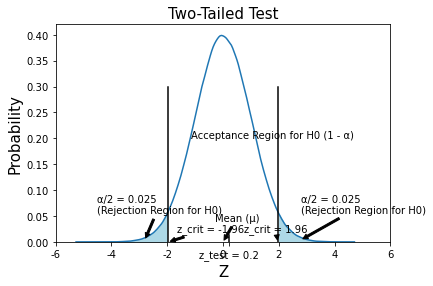

In [13]:
X = stats.norm.rvs(size = 1000000, random_state = 20)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05/2)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.013]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')

plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (2.8, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (-2.8, 0.004), xytext = (-4.5, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1.2, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0), xytext = (-z+0.3, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.text(x = -1.15, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

plt.show()

# Pulse_rate      

In [14]:
def z_test(pop_mean, pop_std, n, samp_mean):
   
    # calculate the test statistic
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

    # return the z-test value
    return z_score

# given data
n = 5000
pop_mean = 110.00395163116018
pop_std = 1.001545518204558
samp_mean = 100

# calculate the test statistic using the function 'z_test'
z_score = z_test(pop_mean, pop_std, n, samp_mean)
print("Z-score:", z_score)

Z-score: -706.2946125241211


In [15]:
p_value = stats.norm.cdf(-706.2946125241211)

# for a two-tailed test multiply the p-value by 2
req_p = p_value*2
print('p-value:', req_p)

p-value: 0.0


In [16]:
print('Confidence interval:', stats.norm.interval(0.95, loc = samp_mean, scale = pop_std / np.sqrt(n)))

Confidence interval: (99.9722390847212, 100.0277609152788)


Here the z score is less than -1.96, p-value is less than 0.05, also the confidence interval do not contain the value in the null hypothesis (i.e. 100), thus we reject the null hypothesis and conclude that there is enough evidence to claim that the mean pulse rate is different from 100.

Let us plot the acceptance and rejection region for a two-tailed test  with 95% confidence.

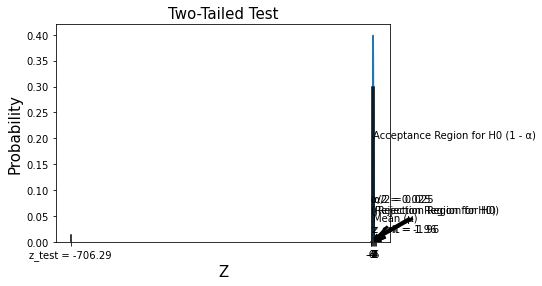

In [17]:
X = stats.norm.rvs(size = 1000000, random_state = 20)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05/2)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.013]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')

plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (2.8, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (-2.8, 0.004), xytext = (-4.5, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1.2, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0), xytext = (-z+0.3, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.text(x = -1.15, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

plt.show()

# Blood_Sugar 

In [18]:
df_pharma.Blood_Sugar.mean()

153.1158

In [19]:
df_pharma.Blood_Sugar.std()

62.0549543052833

In [20]:
def z_test(pop_mean, pop_std, n, samp_mean):
   
    # calculate the test statistic
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

    # return the z-test value
    return z_score

# given data
n = 5000
pop_mean = df_pharma.Blood_Sugar.mean()
pop_std = df_pharma.Blood_Sugar.std()
samp_mean = 150

# calculate the test statistic using the function 'z_test'
z_score = z_test(pop_mean, pop_std, n, samp_mean)
print("Z-score:", z_score)

Z-score: -3.5504067861886592


In [21]:
p_value = stats.norm.cdf(-3.5504067861886592)

# for a two-tailed test multiply the p-value by 2
req_p = p_value*2
print('p-value:', req_p)

p-value: 0.0003846363188906588


In [22]:
print('Confidence interval:', stats.norm.interval(0.95, loc = samp_mean, scale = pop_std / np.sqrt(n)))

Confidence interval: (148.27995603016927, 151.72004396983073)


Here the z score is less than -1.96, p-value is less than 0.05, also the confidence interval do not contain the value in the null hypothesis (i.e. 150), thus we reject the null hypothesis and conclude that there is enough evidence to claim that the mean blood sugar is different from 150.

Let us plot the acceptance and rejection region for a two-tailed test  with 95% confidence.

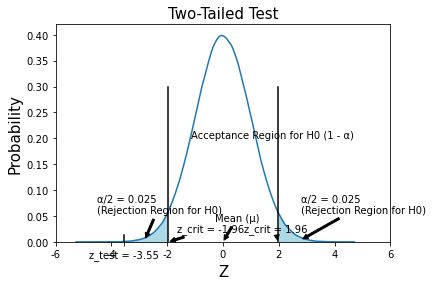

In [23]:
X = stats.norm.rvs(size = 1000000, random_state = 20)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05/2)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.013]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')

plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (2.8, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (-2.8, 0.004), xytext = (-4.5, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1.2, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0), xytext = (-z+0.3, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.text(x = -1.15, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

plt.show()

# Age 

In [24]:
df_pharma.Age.mean()

43.6096

In [25]:
df_pharma.Age.std()

25.584239259741487

In [26]:
def z_test(pop_mean, pop_std, n, samp_mean):
   
    # calculate the test statistic
    z_score = (samp_mean - pop_mean) / (pop_std / np.sqrt(n))

    # return the z-test value
    return z_score

# given data
n = 5000
pop_mean = df_pharma.Age.mean()
pop_std = df_pharma.Age.std()
samp_mean = 40

# calculate the test statistic using the function 'z_test'
z_score = z_test(pop_mean, pop_std, n, samp_mean)
print("Z-score:", z_score)

Z-score: -9.976347592196307


In [27]:
p_value = stats.norm.cdf(-9.976347592196307)

# for a two-tailed test multiply the p-value by 2
req_p = p_value*2
print('p-value:', req_p)

p-value: 1.9345723918034906e-23


In [28]:
print('Confidence interval:', stats.norm.interval(0.95, loc = samp_mean, scale = pop_std / np.sqrt(n)))

Confidence interval: (39.29085409933694, 40.70914590066306)


Here the z score is less than -1.96 and also the confidence interval do not contain the value in the null hypothesis (i.e. 40), thus we reject the null hypothesis and conclude that there is enough evidence to claim that the mean Age is different from 40.

Let us plot the acceptance and rejection region for a two-tailed test  with 95% confidence.

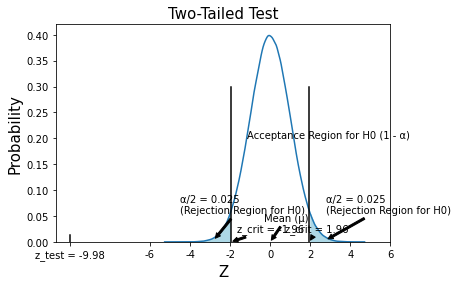

In [29]:
X = stats.norm.rvs(size = 1000000, random_state = 20)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05/2)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.013]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')

plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (2.8, 0.004), xytext = (2.8, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.025\n(Rejection Region for H0)', xy = (-2.8, 0.004), xytext = (-4.5, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1.2, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0), xytext = (-z+0.3, 0.02), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.text(x = -1.15, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(z_score,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(z_score,2))])

plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

plt.show()

# Age

In [30]:
Age_group = []
for value in df_pharma["Age"]:
    if value<=12:
        Age_group.append("A")
    elif value >12 and value <= 25:
        Age_group.append("B")
    elif value >25 and value <= 40:
        Age_group.append("C")
    elif value >40 and value <= 58:
        Age_group.append("D")
    elif value>58:
        Age_group.append("E")
    else:
        Age_group.append("invalid")
        
       
df_pharma["Age_group"] = Age_group   
df_pharma.head(10)

,Patient_id,Oxy_level,Pulse_rate,Blood_Sugar,Age,Sex,Old_1,Old_2,Old_3,New_1,New_2,New_3,Age_group
0,COVPAT0001,97.109182,109.156925,83,5,M,30.08,23.14,33.58,30.51,28.75,22.47,A
1,COVPAT0002,98.039265,109.481086,119,3,M,18.38,28.86,38.32,21.66,28.53,16.05,A
2,COVPAT0003,97.904030,110.428601,80,8,F,30.27,24.32,42.16,21.99,31.26,20.15,A
3,COVPAT0004,99.212383,110.048527,95,5,M,28.81,21.73,21.46,24.66,26.34,15.90,A
4,COVPAT0005,99.235056,110.180046,82,6,M,25.06,32.65,27.54,25.84,20.59,21.65,A
5,COVPAT0006,98.955697,110.725100,97,5,M,24.97,25.79,42.23,27.37,25.13,25.05,A
6,COVPAT0007,98.246181,109.927157,80,3,M,25.15,21.53,31.54,17.55,25.24,20.29,A
7,COVPAT0008,100.082687,109.694405,98,7,F,28.67,23.53,49.29,26.28,24.21,14.60,A
8,COVPAT0009,100.189262,110.339871,81,9,F,29.46,21.79,41.70,19.84,25.24,16.65,A
9,COVPAT0010,99.760662,109.761587,88,7,M,22.46,21.59,40.61,26.24,22.69,23.50,A


In [31]:
df_pharma.Sex.value_counts()

F    2544
M    2456
Name: Sex, dtype: int64

In [32]:
df_pharma.Age_group.value_counts()

E    1969
A     964
D     835
C     670
B     562
Name: Age_group, dtype: int64

# GROUP A

In [33]:
sexF = df_pharma[(df_pharma['Sex'] == 'F')][(df_pharma['Age_group'] == 'A')]['Age']
n_1 = len(sexF)
nl_mean = np.mean(sexF)
nl_std = statistics.stdev(sexF)
sexM = df_pharma[(df_pharma['Sex'] == 'M')][(df_pharma['Age_group'] == 'A')]['Age']
n_2 = len(sexM)
nl_mean2 = np.mean(sexM)
nl_std2 = statistics.stdev(sexM)

In [34]:
stat, p_value = shapiro(df_pharma[(df_pharma['Age_group'] == 'A')]['Age'])
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.9496930241584778
P-Value: 1.268962971184635e-17


In [35]:
stat, p_value = stats.levene(sexF, sexM)
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 3.124998529701531
P-Value: 0.07741689029437024


# GROUP B

In [36]:
sexFB = df_pharma[(df_pharma['Sex'] == 'F')][(df_pharma['Age_group'] == 'B')]['Age']
n_1B = len(sexFB)
nl_meanB = np.mean(sexFB)
nl_stdB = statistics.stdev(sexFB)
sexMB = df_pharma[(df_pharma['Sex'] == 'M')][(df_pharma['Age_group'] == 'B')]['Age']
n_2B = len(sexMB)
nl_mean2B = np.mean(sexMB)
nl_std2B = statistics.stdev(sexMB)
statB, p_valueB = shapiro(df_pharma[(df_pharma['Age_group'] == 'B')]['Age'])
print('Test statistic:', statB)
print('P-Value:', p_valueB)
statB, p_valueB = stats.levene(sexFB, sexMB)
print('Test statistic:', statB)
print('P-Value:', p_valueB)

Test statistic: 0.9338072538375854
P-Value: 4.4797425351758655e-15
Test statistic: 0.6339484783251154
P-Value: 0.426248066173354


# GROUP C

In [37]:
sexFC = df_pharma[(df_pharma['Sex'] == 'F')][(df_pharma['Age_group'] == 'C')]['Age']
n_1C = len(sexFC)
nl_meanC = np.mean(sexFC)
nl_stdC = statistics.stdev(sexFC)
sexMC = df_pharma[(df_pharma['Sex'] == 'M')][(df_pharma['Age_group'] == 'C')]['Age']
n_2C = len(sexMC)
nl_mean2C = np.mean(sexMC)
nl_std2C = statistics.stdev(sexMC)
statC, p_valueC = shapiro(df_pharma[(df_pharma['Age_group'] == 'C')]['Age'])
print('Test statistic:', statC)
print('P-Value:', p_valueC)
statC, p_valueC = stats.levene(sexFC, sexMC)
print('Test statistic:', statC)
print('P-Value:', p_valueC)

Test statistic: 0.9381119012832642
P-Value: 4.614252214232796e-16
Test statistic: 0.12207270797001915
P-Value: 0.7269073655926956


# GROUP D

In [38]:
sexFD = df_pharma[(df_pharma['Sex'] == 'F')][(df_pharma['Age_group'] == 'D')]['Age']
n_1D = len(sexFD)
nl_meanD = np.mean(sexFD)
nl_stdD = statistics.stdev(sexFD)
sexMD = df_pharma[(df_pharma['Sex'] == 'M')][(df_pharma['Age_group'] == 'D')]['Age']
n_2D = len(sexMD)
nl_mean2D = np.mean(sexMD)
nl_std2D = statistics.stdev(sexMD)
statD, p_valueD = shapiro(df_pharma[(df_pharma['Age_group'] == 'D')]['Age'])
print('Test statistic:', statD)
print('P-Value:', p_valueD)
statD, p_valueD = stats.levene(sexFD, sexMD)
print('Test statistic:', statD)
print('P-Value:', p_valueD)

Test statistic: 0.9387657642364502
P-Value: 4.842914598239219e-18
Test statistic: 0.0430093639440802
P-Value: 0.83575832878635


# GROUP E

In [39]:
sexFE = df_pharma[(df_pharma['Sex'] == 'F')][(df_pharma['Age_group'] == 'E')]['Age']
n_1E = len(sexFE)
nl_meanE = np.mean(sexFE)
nl_stdE = statistics.stdev(sexFE)
sexME = df_pharma[(df_pharma['Sex'] == 'M')][(df_pharma['Age_group'] == 'E')]['Age']
n_2E = len(sexME)
nl_mean2E = np.mean(sexME)
nl_std2E = statistics.stdev(sexME)
statE, p_valueE = shapiro(df_pharma[(df_pharma['Age_group'] == 'E')]['Age'])
print('Test statistic:', statE)
print('P-Value:', p_valueE)
statE, p_valueE = stats.levene(sexFE, sexME)
print('Test statistic:', statE)
print('P-Value:', p_valueE)

Test statistic: 0.9512972235679626
P-Value: 4.5063043191645465e-25
Test statistic: 0.5154714738483903
P-Value: 0.47286510222517053


From the above result, we can see that the p-value is greater than 0.05, thus we can say that the AGE of the POPULATION  are normally distributed.

# New Drug works better OR not

In [40]:
df_pharma.head(10)

,Patient_id,Oxy_level,Pulse_rate,Blood_Sugar,Age,Sex,Old_1,Old_2,Old_3,New_1,New_2,New_3,Age_group
0,COVPAT0001,97.109182,109.156925,83,5,M,30.08,23.14,33.58,30.51,28.75,22.47,A
1,COVPAT0002,98.039265,109.481086,119,3,M,18.38,28.86,38.32,21.66,28.53,16.05,A
2,COVPAT0003,97.904030,110.428601,80,8,F,30.27,24.32,42.16,21.99,31.26,20.15,A
3,COVPAT0004,99.212383,110.048527,95,5,M,28.81,21.73,21.46,24.66,26.34,15.90,A
4,COVPAT0005,99.235056,110.180046,82,6,M,25.06,32.65,27.54,25.84,20.59,21.65,A
5,COVPAT0006,98.955697,110.725100,97,5,M,24.97,25.79,42.23,27.37,25.13,25.05,A
6,COVPAT0007,98.246181,109.927157,80,3,M,25.15,21.53,31.54,17.55,25.24,20.29,A
7,COVPAT0008,100.082687,109.694405,98,7,F,28.67,23.53,49.29,26.28,24.21,14.60,A
8,COVPAT0009,100.189262,110.339871,81,9,F,29.46,21.79,41.70,19.84,25.24,16.65,A
9,COVPAT0010,99.760662,109.761587,88,7,M,22.46,21.59,40.61,26.24,22.69,23.50,A


In [41]:
df_pharma['avg_old_med']=df_pharma[['Old_1', 'Old_2','Old_3']].mean(axis=1)
df_pharma.head(10)

,Patient_id,Oxy_level,Pulse_rate,Blood_Sugar,Age,Sex,Old_1,Old_2,Old_3,New_1,New_2,New_3,Age_group,avg_old_med
0,COVPAT0001,97.109182,109.156925,83,5,M,30.08,23.14,33.58,30.51,28.75,22.47,A,28.933333
1,COVPAT0002,98.039265,109.481086,119,3,M,18.38,28.86,38.32,21.66,28.53,16.05,A,28.520000
2,COVPAT0003,97.904030,110.428601,80,8,F,30.27,24.32,42.16,21.99,31.26,20.15,A,32.250000
3,COVPAT0004,99.212383,110.048527,95,5,M,28.81,21.73,21.46,24.66,26.34,15.90,A,24.000000
4,COVPAT0005,99.235056,110.180046,82,6,M,25.06,32.65,27.54,25.84,20.59,21.65,A,28.416667
5,COVPAT0006,98.955697,110.725100,97,5,M,24.97,25.79,42.23,27.37,25.13,25.05,A,30.996667
6,COVPAT0007,98.246181,109.927157,80,3,M,25.15,21.53,31.54,17.55,25.24,20.29,A,26.073333
7,COVPAT0008,100.082687,109.694405,98,7,F,28.67,23.53,49.29,26.28,24.21,14.60,A,33.830000
8,COVPAT0009,100.189262,110.339871,81,9,F,29.46,21.79,41.70,19.84,25.24,16.65,A,30.983333
9,COVPAT0010,99.760662,109.761587,88,7,M,22.46,21.59,40.61,26.24,22.69,23.50,A,28.220000


In [42]:
df_pharma['avg_new_med']=df_pharma[['New_1', 'New_2','New_3']].mean(axis=1)
df_pharma.head(10)

,Patient_id,Oxy_level,Pulse_rate,Blood_Sugar,Age,Sex,Old_1,Old_2,Old_3,New_1,New_2,New_3,Age_group,avg_old_med,avg_new_med
0,COVPAT0001,97.109182,109.156925,83,5,M,30.08,23.14,33.58,30.51,28.75,22.47,A,28.933333,27.243333
1,COVPAT0002,98.039265,109.481086,119,3,M,18.38,28.86,38.32,21.66,28.53,16.05,A,28.520000,22.080000
2,COVPAT0003,97.904030,110.428601,80,8,F,30.27,24.32,42.16,21.99,31.26,20.15,A,32.250000,24.466667
3,COVPAT0004,99.212383,110.048527,95,5,M,28.81,21.73,21.46,24.66,26.34,15.90,A,24.000000,22.300000
4,COVPAT0005,99.235056,110.180046,82,6,M,25.06,32.65,27.54,25.84,20.59,21.65,A,28.416667,22.693333
5,COVPAT0006,98.955697,110.725100,97,5,M,24.97,25.79,42.23,27.37,25.13,25.05,A,30.996667,25.850000
6,COVPAT0007,98.246181,109.927157,80,3,M,25.15,21.53,31.54,17.55,25.24,20.29,A,26.073333,21.026667
7,COVPAT0008,100.082687,109.694405,98,7,F,28.67,23.53,49.29,26.28,24.21,14.60,A,33.830000,21.696667
8,COVPAT0009,100.189262,110.339871,81,9,F,29.46,21.79,41.70,19.84,25.24,16.65,A,30.983333,20.576667
9,COVPAT0010,99.760662,109.761587,88,7,M,22.46,21.59,40.61,26.24,22.69,23.50,A,28.220000,24.143333


In [43]:
old_pharma = df_pharma['avg_old_med']

n_1 = len(old_pharma)

old_mean = np.mean(old_pharma)

old_std = statistics.stdev(old_pharma)

new_pharma = df_pharma['avg_new_med']

n_2 = len(new_pharma)

new_mean = np.mean(new_pharma)

new_std = statistics.stdev(new_pharma)

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} \leq 0$ <br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} > 0$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [44]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


In [45]:
z_score, pval = stests.ztest( x1 = new_pharma,x2 = old_pharma, value = 0, alternative = 'larger')

print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  -106.53706251851877
p-value:  1.0


In [46]:
print('Confidence interval:', stats.norm.interval(0.95, loc = new_mean - old_mean, 
                                                scale = np.sqrt(((new_mean**2) / n_1) + ((old_mean**2) / n_2))))

Confidence interval: (-7.913481629303639, -5.8462037040296195)


Here the z score is less than 1.64, the p-value is greater than 0.01, also the confidence interval contains the value in the null hypothesis (i.e. 0), thus we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the claim of the new medicine better than the old medicine is correct.

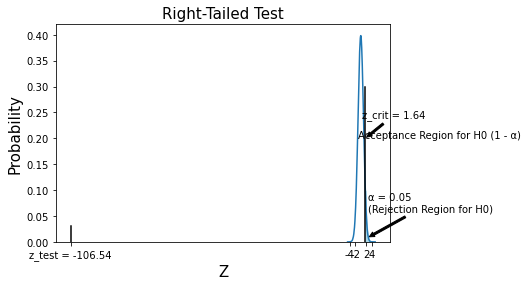

In [47]:

X = stats.norm.rvs(size = 2000000, random_state = 18)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.03]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.5, 0.008), xytext = (2.5, 0.058), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.2), xytext = (z-1.1, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))


plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')


plt.xticks(ticks = [-4, -2, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 2, 4, 'z_test = '+str(round(z_score,2))])


plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()

# GRADUAL PROGRESS OF MEDICINE

# new drug 1st phase vs old drug 1st phase


In [48]:
df_pharma.head(10)

,Patient_id,Oxy_level,Pulse_rate,Blood_Sugar,Age,Sex,Old_1,Old_2,Old_3,New_1,New_2,New_3,Age_group,avg_old_med,avg_new_med
0,COVPAT0001,97.109182,109.156925,83,5,M,30.08,23.14,33.58,30.51,28.75,22.47,A,28.933333,27.243333
1,COVPAT0002,98.039265,109.481086,119,3,M,18.38,28.86,38.32,21.66,28.53,16.05,A,28.520000,22.080000
2,COVPAT0003,97.904030,110.428601,80,8,F,30.27,24.32,42.16,21.99,31.26,20.15,A,32.250000,24.466667
3,COVPAT0004,99.212383,110.048527,95,5,M,28.81,21.73,21.46,24.66,26.34,15.90,A,24.000000,22.300000
4,COVPAT0005,99.235056,110.180046,82,6,M,25.06,32.65,27.54,25.84,20.59,21.65,A,28.416667,22.693333
5,COVPAT0006,98.955697,110.725100,97,5,M,24.97,25.79,42.23,27.37,25.13,25.05,A,30.996667,25.850000
6,COVPAT0007,98.246181,109.927157,80,3,M,25.15,21.53,31.54,17.55,25.24,20.29,A,26.073333,21.026667
7,COVPAT0008,100.082687,109.694405,98,7,F,28.67,23.53,49.29,26.28,24.21,14.60,A,33.830000,21.696667
8,COVPAT0009,100.189262,110.339871,81,9,F,29.46,21.79,41.70,19.84,25.24,16.65,A,30.983333,20.576667
9,COVPAT0010,99.760662,109.761587,88,7,M,22.46,21.59,40.61,26.24,22.69,23.50,A,28.220000,24.143333


In [49]:
Old_1 = df_pharma['Old_1']

Old_1_1 = len(Old_1)

Old_1_mean = np.mean(Old_1)

Old_1_std = statistics.stdev(Old_1)

New_1 = df_pharma['New_1']

New_1_2 = len(New_1)

New_1_mean = np.mean(New_1)

New_1_std = statistics.stdev(New_1)

In [50]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


In [51]:
z_score, pval = stests.ztest( x1 = New_1,x2 = Old_1, value = 0, alternative = 'larger')

print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  0.31003709333238755
p-value:  0.378266374396514


In [52]:
print('Confidence interval:', stats.norm.interval(0.95, loc = New_1_mean - Old_1_mean, 
                                                scale = np.sqrt(((New_1_std**2) / n_1) + ((Old_1_std**2) / n_2))))

Confidence interval: (-0.13219122762727942, 0.1818712276271821)


The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} \leq 0$ <br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} > 0$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

Here the z score is less than 1.64, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0), thus we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the claim of the new medicine 1st phase better than the old medicine 1st phase is correct.

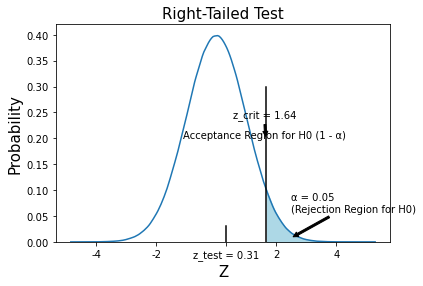

In [53]:
X = stats.norm.rvs(size = 2000000, random_state = 18)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.03]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.5, 0.008), xytext = (2.5, 0.058), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.2), xytext = (z-1.1, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))


plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')


plt.xticks(ticks = [-4, -2, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 2, 4, 'z_test = '+str(round(z_score,2))])


plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()

# new drug 2nd phase vs old drug 2nd phase


In [54]:
Old_2 = df_pharma['Old_2']

Old_2_1 = len(Old_2)

Old_2_mean = np.mean(Old_2)

Old_2_std = statistics.stdev(Old_2)

New_2 = df_pharma['New_2']

New_2_2 = len(New_2)

New_2_mean = np.mean(New_2)

New_2_std = statistics.stdev(New_2)

In [55]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


In [56]:
z_score, pval = stests.ztest( x1 = New_2,x2 = Old_2, value = 0, alternative = 'larger')

print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  11.682067948037085
p-value:  7.870925856173685e-32


In [57]:
print('Confidence interval:', stats.norm.interval(0.95, loc = New_2_mean - Old_2_mean, 
                                                scale = np.sqrt(((New_2_std**2) / n_1) + ((Old_2_std**2) / n_2))))

Confidence interval: (0.8731200843575772, 1.225159915642049)


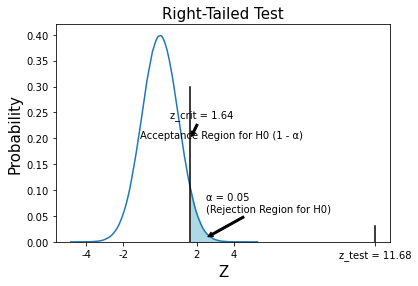

In [58]:
X = stats.norm.rvs(size = 2000000, random_state = 18)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.03]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.5, 0.008), xytext = (2.5, 0.058), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.2), xytext = (z-1.1, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))


plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')


plt.xticks(ticks = [-4, -2, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 2, 4, 'z_test = '+str(round(z_score,2))])


plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} \leq 0$ <br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} > 0$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

Here the z score is greater than 1.64, the p-value is less than 0.05, also the confidence interval not contains the value in the null hypothesis (i.e. 0), thus we reject the null hypothesis and we have enough evidence to conclude that the claim of the new medicine 2nd phase better than the old medicine 2nd phase is correct.

# new drug 3rd phase vs old drug 3rd phase


In [59]:
Old_3 = df_pharma['Old_3']

Old_3_1 = len(Old_3)

Old_3_mean = np.mean(Old_3)

Old_3_std = statistics.stdev(Old_3)

New_3 = df_pharma['New_3']

New_3_2 = len(New_3)

New_3_mean = np.mean(New_3)

New_3_std = statistics.stdev(New_3)

In [60]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


In [61]:
z_score, pval = stests.ztest( x1 = New_3,x2 = Old_3, value = 0, alternative = 'larger')

print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  -143.20633591331273
p-value:  1.0


In [62]:
print('Confidence interval:', stats.norm.interval(0.95, loc = New_3_mean - Old_3_mean, 
                                                scale = np.sqrt(((New_3_std**2) / n_1) + ((Old_3_std**2) / n_2))))

Confidence interval: (-22.010685449493476, -21.416330550506547)


The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} \leq 0$ <br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} > 0$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

Here the z score is less than 1.64, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0), thus we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the claim of the new medicine 3RD phase better than the old medicine 3RD phase is correct.

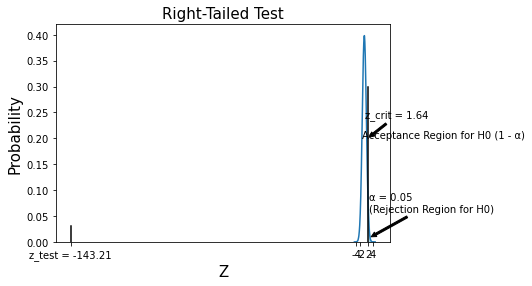

In [63]:
X = stats.norm.rvs(size = 2000000, random_state = 18)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.03]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.5, 0.008), xytext = (2.5, 0.058), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.2), xytext = (z-1.1, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))


plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')


plt.xticks(ticks = [-4, -2, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 2, 4, 'z_test = '+str(round(z_score,2))])


plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()

# new vs old medicine in children

In [64]:
df_pharma.head(10)

,Patient_id,Oxy_level,Pulse_rate,Blood_Sugar,Age,Sex,Old_1,Old_2,Old_3,New_1,New_2,New_3,Age_group,avg_old_med,avg_new_med
0,COVPAT0001,97.109182,109.156925,83,5,M,30.08,23.14,33.58,30.51,28.75,22.47,A,28.933333,27.243333
1,COVPAT0002,98.039265,109.481086,119,3,M,18.38,28.86,38.32,21.66,28.53,16.05,A,28.520000,22.080000
2,COVPAT0003,97.904030,110.428601,80,8,F,30.27,24.32,42.16,21.99,31.26,20.15,A,32.250000,24.466667
3,COVPAT0004,99.212383,110.048527,95,5,M,28.81,21.73,21.46,24.66,26.34,15.90,A,24.000000,22.300000
4,COVPAT0005,99.235056,110.180046,82,6,M,25.06,32.65,27.54,25.84,20.59,21.65,A,28.416667,22.693333
5,COVPAT0006,98.955697,110.725100,97,5,M,24.97,25.79,42.23,27.37,25.13,25.05,A,30.996667,25.850000
6,COVPAT0007,98.246181,109.927157,80,3,M,25.15,21.53,31.54,17.55,25.24,20.29,A,26.073333,21.026667
7,COVPAT0008,100.082687,109.694405,98,7,F,28.67,23.53,49.29,26.28,24.21,14.60,A,33.830000,21.696667
8,COVPAT0009,100.189262,110.339871,81,9,F,29.46,21.79,41.70,19.84,25.24,16.65,A,30.983333,20.576667
9,COVPAT0010,99.760662,109.761587,88,7,M,22.46,21.59,40.61,26.24,22.69,23.50,A,28.220000,24.143333


In [65]:
AGE_Old_1 = df_pharma[(df_pharma['Age_group'] == 'A')]['avg_old_med']
n_1=len(AGE_Old_1)
AGE_Old_1_mean=np.mean(AGE_Old_1)
AGE_Old_1_std=statistics.stdev(AGE_Old_1)

AGE_New_1 = df_pharma[(df_pharma['Age_group'] == 'A')]['avg_new_med']
n_2=len(AGE_New_1)
AGE_New_1_mean=np.mean(AGE_New_1)
AGE_New_1_std=statistics.stdev(AGE_New_1)

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} \leq 0$ <br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} > 0$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [66]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


In [67]:
z_score, pval = stests.ztest( x1 = AGE_New_1,x2 = AGE_Old_1, value = 0, alternative = 'larger')

print("Z-score: ", z_score)
print("p-value: ", pval)

Z-score:  -46.82380021789492
p-value:  1.0


In [68]:
print('Confidence interval:', stats.norm.interval(0.95, loc = AGE_New_1_mean - AGE_Old_1_mean, 
                                                scale = np.sqrt(((AGE_New_1_std**2) / n_2) + ((AGE_Old_1_std**2) / n_1))))

Confidence interval: (-7.204075376789932, -6.625205397760501)


Here the z score is less than 1.64, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0), thus we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the claim of the new medicine in children better than the old medicine is correct.

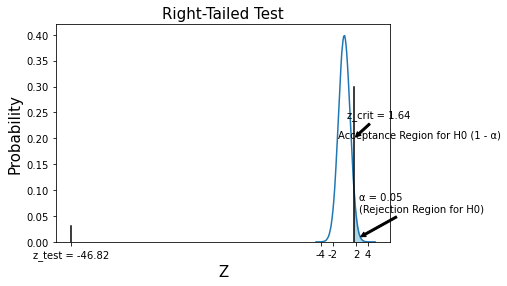

In [69]:
X = stats.norm.rvs(size = 2000000, random_state = 18)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.03]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.5, 0.008), xytext = (2.5, 0.058), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.2), xytext = (z-1.1, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))


plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')


plt.xticks(ticks = [-4, -2, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 2, 4, 'z_test = '+str(round(z_score,2))])


plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()

# new vs old medicine in teenager

In [70]:
AGE_Old_2 = df_pharma[(df_pharma['Age_group'] == 'B')]['avg_old_med']
n_10=len(AGE_Old_2)
AGE_Old_2_mean=np.mean(AGE_Old_2)
AGE_Old_2_std=statistics.stdev(AGE_Old_2)

AGE_New_2 = df_pharma[(df_pharma['Age_group'] == 'B')]['avg_new_med']
n_20=len(AGE_New_2)
AGE_New_2_mean=np.mean(AGE_New_2)
AGE_New_2_std=statistics.stdev(AGE_New_2)

The null and alternative hypothesis is:

H<sub>0</sub>: $\mu_{1} - \mu_{2} \leq 0$ <br>
H<sub>1</sub>: $\mu_{1} - \mu_{2} > 0$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [71]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

z_score, pval = stests.ztest( x1 = AGE_New_2,x2 = AGE_Old_2, value = 0, alternative = 'larger')

print("Z-score: ", z_score)
print("p-value: ", pval)

print('Confidence interval:', stats.norm.interval(0.95, loc = AGE_New_2_mean - AGE_Old_2_mean, 
                                                scale = np.sqrt(((AGE_New_2_std**2) / n_20) + ((AGE_Old_2_std**2) / n_10))))

Critical value for one-tailed Z-test: 1.64
Z-score:  -35.64508130023732
p-value:  1.0
Confidence interval: (-7.2373759982167725, -6.482956148876949)


Here the z score is less than 1.64, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0), thus we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the claim of the new medicine in teenager better than the old medicine is correct.

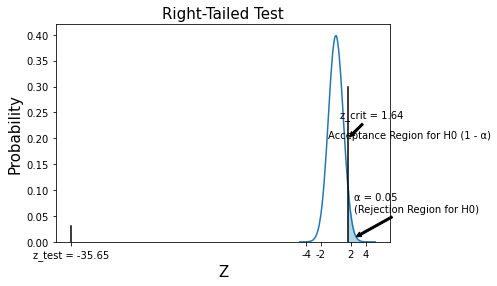

In [72]:
X = stats.norm.rvs(size = 2000000, random_state = 18)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.03]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.5, 0.008), xytext = (2.5, 0.058), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.2), xytext = (z-1.1, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))


plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')


plt.xticks(ticks = [-4, -2, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 2, 4, 'z_test = '+str(round(z_score,2))])


plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()

# new vs old medicine in adult

In [73]:
AGE_Old_3 = df_pharma[(df_pharma['Age_group'] == 'C')]['avg_old_med']
n_11=len(AGE_Old_3)
AGE_Old_3_mean=np.mean(AGE_Old_3)
AGE_Old_3_std=statistics.stdev(AGE_Old_3)

AGE_New_3 = df_pharma[(df_pharma['Age_group'] == 'C')]['avg_new_med']
n_21=len(AGE_New_3)
AGE_New_3_mean=np.mean(AGE_New_3)
AGE_New_3_std=statistics.stdev(AGE_New_3)

In [74]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

z_score, pval = stests.ztest( x1 = AGE_New_3,x2 = AGE_Old_3, value = 0, alternative = 'larger')

print("Z-score: ", z_score)
print("p-value: ", pval)

print('Confidence interval:', stats.norm.interval(0.95, loc = AGE_New_3_mean - AGE_Old_3_mean, 
                                                scale = np.sqrt(((AGE_New_3_std**2) / n_21) + ((AGE_Old_3_std**2) / n_11))))

Critical value for one-tailed Z-test: 1.64
Z-score:  -37.518713154290005
p-value:  1.0
Confidence interval: (-6.997849038135912, -6.3030166335057904)


Here the z score is less than 1.64, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0), thus we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the claim of the new medicine in adult better than the old medicine is correct.

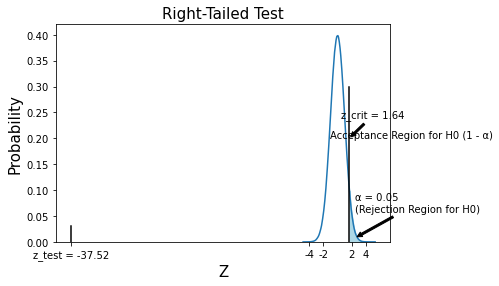

In [75]:
X = stats.norm.rvs(size = 2000000, random_state = 18)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.03]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.5, 0.008), xytext = (2.5, 0.058), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.2), xytext = (z-1.1, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))


plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')


plt.xticks(ticks = [-4, -2, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 2, 4, 'z_test = '+str(round(z_score,2))])


plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()

# new vs old medicine in old

In [76]:
AGE_Old_4 = df_pharma[(df_pharma['Age_group'] == 'D')]['avg_old_med']
n_12=len(AGE_Old_4)
AGE_Old_4_mean=np.mean(AGE_Old_4)
AGE_Old_4_std=statistics.stdev(AGE_Old_4)

AGE_New_4 = df_pharma[(df_pharma['Age_group'] == 'D')]['avg_new_med']
n_22=len(AGE_New_4)
AGE_New_4_mean=np.mean(AGE_New_4)
AGE_New_4_std=statistics.stdev(AGE_New_4)

In [77]:
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

z_score, pval = stests.ztest( x1 = AGE_New_4,x2 = AGE_Old_4, value = 0, alternative = 'larger')

print("Z-score: ", z_score)
print("p-value: ", pval)

print('Confidence interval:', stats.norm.interval(0.95, loc = AGE_New_4_mean - AGE_Old_4_mean, 
                                                scale = np.sqrt(((AGE_New_4_std**2) / n_22) + ((AGE_Old_4_std**2) / n_12))))

Critical value for one-tailed Z-test: 1.64
Z-score:  -43.29832909489176
p-value:  1.0
Confidence interval: (-7.1343757659653395, -6.516450581340015)


Here the z score is less than 1.64, the p-value is greater than 0.05, also the confidence interval contains the value in the null hypothesis (i.e. 0), thus we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the claim of the new medicine in old better than the old medicine is correct.

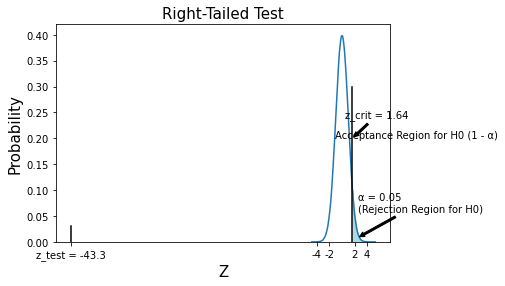

In [78]:
X = stats.norm.rvs(size = 2000000, random_state = 18)

ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

plt.ylim(0, 0.42)

z = stats.norm.isf(q = 0.05)

x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

x, y = [z_score, z_score], [0, 0.03]
plt.plot(x, y, color = 'black')

l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2.5, 0.008), xytext = (2.5, 0.058), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.2), xytext = (z-1.1, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))


plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')


plt.xticks(ticks = [-4, -2, 2, 4, round(z_score,2)], 
           labels = [-4, -2, 2, 4, 'z_test = '+str(round(z_score,2))])


plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

plt.show()

# conclusion:

We cannot accept that the new medicine works better than old medicine. All datas are taken randomely. Only in 2nd phase new medicine works better in gradual progression. Most of the time old medicine works better in 1st and 3rd phase and also for children, teenager, adult and old people.